In [1]:
import torch
import torch.utils.data as tdata
import models.abc_rnn as abcrnn
from lib.tune_abc import DatasetTuneABC, parse_abc_tune, TuneABC
import random
import matplotlib.pyplot as plt
from models.abc_rnn import Dataset
import numpy as np

In [2]:
model: abcrnn.Model = torch.jit.load("models/serialized/abcrnn-h512-e25.pt")

In [3]:
ds = DatasetTuneABC().load("data/dataset_abctunes.json")

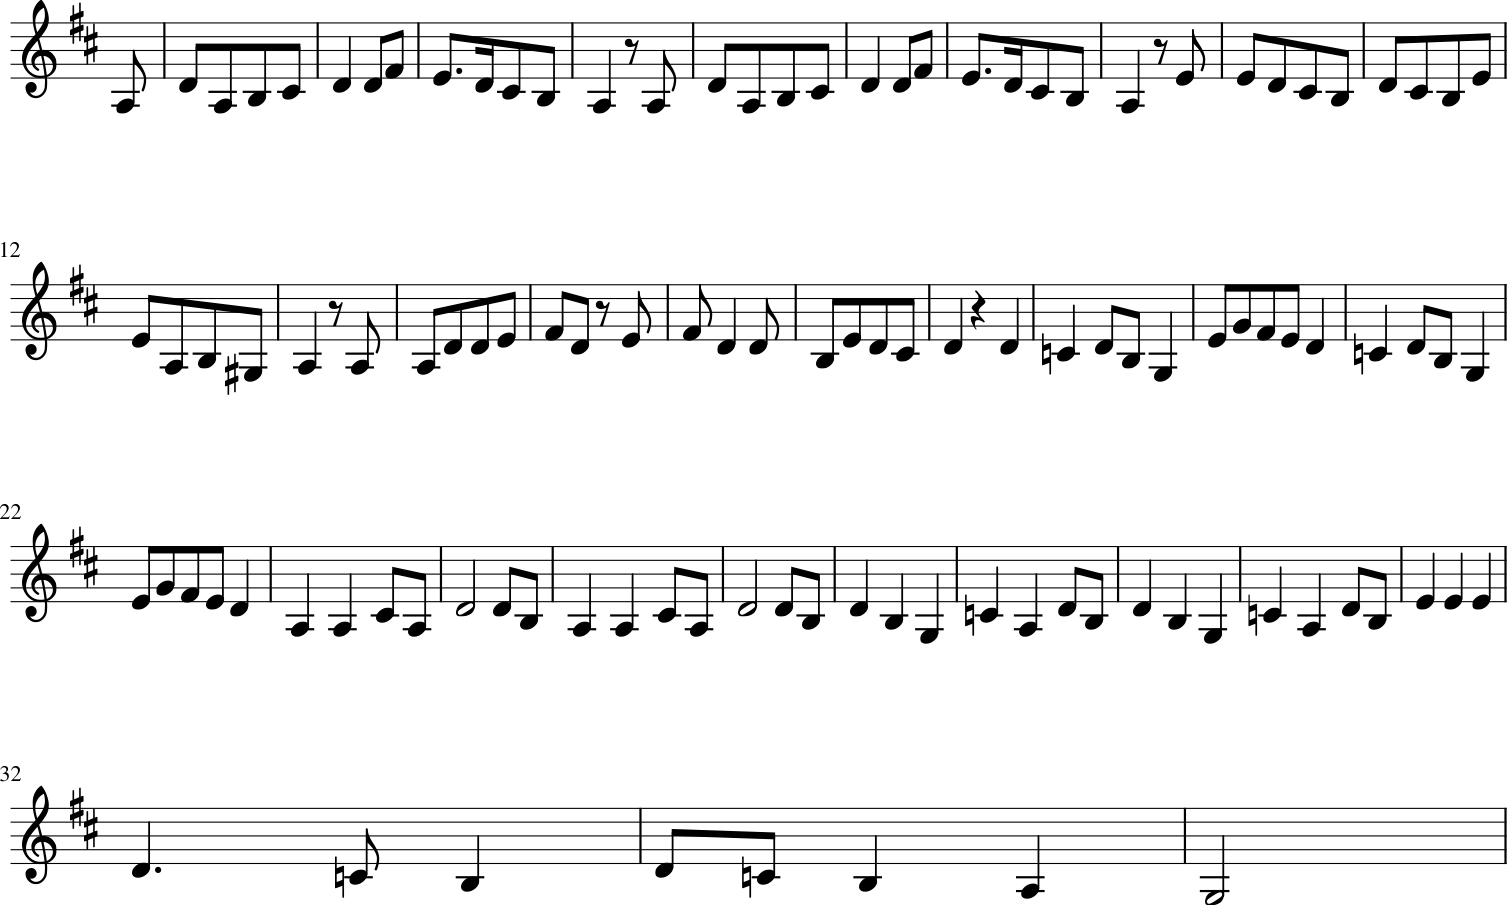

In [26]:
sth = ds.abc_tune(7000).convert_to_music21().show()

In [4]:
def encode_tune(ds: DatasetTuneABC, tune: TuneABC) -> np.ndarray:
    tc = len(ds.tune_codec.code2raw)
    key_code = ds.key_codec.raw2code[tune.K] + tc
    tc += len(ds.key_codec.code2raw)
    bit_code = ds.bit_codec.raw2code[tune.L] + tc
    tune_code = ds.get_data_from_tune(tune)
    print([key_code], [bit_code], tune_code)
    return np.array([key_code] + [bit_code] + tune_code.tolist())

encode_tune(ds, ds.abc_tune(0))

[43] [61] [27  1 23 11 24 30 25 11 26  1 27 11 27 26 11  0 27  1 30 21 11 27 26 30
 25 26  1 27 13  6 27 11  0 27  1 27 30 21 30 22 22 21 27  1 27 11 26 26
 11  0 26  1 30 25 26 27 27 26 25  1 30 25 11 24 24 11  0 27  1 27 26 30
 25 24 23 22  5  1 23 13  6 23 11]


array([43, 61, 27,  1, 23, 11, 24, 30, 25, 11, 26,  1, 27, 11, 27, 26, 11,
        0, 27,  1, 30, 21, 11, 27, 26, 30, 25, 26,  1, 27, 13,  6, 27, 11,
        0, 27,  1, 27, 30, 21, 30, 22, 22, 21, 27,  1, 27, 11, 26, 26, 11,
        0, 26,  1, 30, 25, 26, 27, 27, 26, 25,  1, 30, 25, 11, 24, 24, 11,
        0, 27,  1, 27, 26, 30, 25, 24, 23, 22,  5,  1, 23, 13,  6, 23, 11])

In [5]:
def encode_tune(model: abcrnn.Model, tune: TuneABC) -> torch.Tensor:

    print(tune)
    print(ds.tune_tokenized(tune))
    tt = ds.squeeze_tokenized_tune(ds.tune_tokenized(tune))
    
    encoded: list[torch.Tensor] = []
    for token in [f"K: {tune.K}\n"] + [f"L: {tune.L}\n"] + tt:
        encoded.append(torch.tensor([model.codec.token2code[token]]))
    return torch.concat(encoded)
encode_tune(model, ds.abc_tune(0))

X: 0
T: 0
L: 1/8
K: C
G | C2D_E2F | G2GF2
G | _A2GF_EF | G3-G2
G | G_A_BBAG | G2FF2
F | _EFGGFE | _E2DD2
G | GF_EDCB, | C3-C2

[[['G'], ['C', '2', 'D', '_', 'E', '2', 'F'], ['G', '2', 'G', 'F', '2']], [['G'], ['_', 'A', '2', 'G', 'F', '_', 'E', 'F'], ['G', '3', '-', 'G', '2']], [['G'], ['G', '_', 'A', '_', 'B', 'B', 'A', 'G'], ['G', '2', 'F', 'F', '2']], [['F'], ['_', 'E', 'F', 'G', 'G', 'F', 'E'], ['_', 'E', '2', 'D', 'D', '2']], [['G'], ['G', 'F', '_', 'E', 'D', 'C', 'B', ','], ['C', '3', '-', 'C', '2']]]


tensor([43, 61, 27,  1, 23, 11, 24, 30, 25, 11, 26,  1, 27, 11, 27, 26, 11,  0,
        27,  1, 30, 21, 11, 27, 26, 30, 25, 26,  1, 27, 13,  6, 27, 11,  0, 27,
         1, 27, 30, 21, 30, 22, 22, 21, 27,  1, 27, 11, 26, 26, 11,  0, 26,  1,
        30, 25, 26, 27, 27, 26, 25,  1, 30, 25, 11, 24, 24, 11,  0, 27,  1, 27,
        26, 30, 25, 24, 23, 22,  5,  1, 23, 13,  6, 23, 11])

In [5]:
print("".join(ds.abc_tune(0).tokenize()))

G|C2D_E2F|G2GF2
G|_A2GF_EF|G3-G2
G|G_A_BBAG|G2FF2
F|_EFGGFE|_E2DD2
G|GF_EDCB,|C3-C2


In [15]:
tune = ds.abc_tune(0).tune
print(tune)
tokens = []
for i, line in enumerate(tune):
    for j, bar in enumerate(line):
        tokens.extend(ds.abc_tune(0).tokenize(bar))
        if j + 1 != len(line):
            tokens.append("|")
    if i + 1 != len(tune):
        tokens.append("\n")
print(ds.abc_tune(0))
print("".join(tokens))

[['G', 'C2D_E2F', 'G2GF2'], ['G', '_A2GF_EF', 'G3-G2'], ['G', 'G_A_BBAG', 'G2FF2'], ['F', '_EFGGFE', '_E2DD2'], ['G', 'GF_EDCB,', 'C3-C2']]
X: 0
T: 0
L: 1/8
K: C
G | C2D_E2F | G2GF2
G | _A2GF_EF | G3-G2
G | G_A_BBAG | G2FF2
F | _EFGGFE | _E2DD2
G | GF_EDCB, | C3-C2

G|C2D_E2F|G2GF2
G|_A2GF_EF|G3-G2
G|G_A_BBAG|G2FF2
F|_EFGGFE|_E2DD2
G|GF_EDCB,|C3-C2


In [257]:
prompt = encode_tune(model, ds.abc_tune(0))[:10]
print(prompt)
print(model.codec.decode(prompt))
tune = parse_abc_tune( model.generate_tune(prompt, max_len=800).splitlines())
print(tune)

tensor([43, 61, 27,  1, 23, 11, 24, 30, 25, 11])
['K: C\n', 'L: 1/8\n', 'G', '|', 'C', '2', 'D', '_', 'E', '2']
X: 0
L: 1/8
K: C
G | C2D_E2C | E2DD2
D | =GAGFDE | F3Gz
G | =FGAGFE | =G2^DD2z
E3_EDC | B,3-C2
G | G2EEDC | G2z3
(3FE | D3CD2 | D3z2



In [233]:
print(model.codec.code)

['\n', '|', "'", '(', '(3', ',', '-', '/', '1', '12', '16', '2', '24', '3', '32', '4', '6', '8', '<', '=', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'z', 'K: A\n', 'K: Ab\n', 'K: B\n', 'K: Bb\n', 'K: C\n', 'K: Cb\n', 'K: Cm\n', 'K: D\n', 'K: Db\n', 'K: Dm\n', 'K: E\n', 'K: Eb\n', 'K: Em\n', 'K: F\n', 'K: F#\n', 'K: G\n', 'K: Gm\n', 'L: 1/1\n', 'L: 1/16\n', 'L: 1/2\n', 'L: 1/32\n', 'L: 1/4\n', 'L: 1/8\n', '<s>', '<e>', '<p>']


In [228]:
model.codec.code

['\n',
 '|',
 "'",
 '(',
 '(3',
 ',',
 '-',
 '/',
 '1',
 '12',
 '16',
 '2',
 '24',
 '3',
 '32',
 '4',
 '6',
 '8',
 '<',
 '=',
 '>',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'Z',
 '^',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'z',
 'K: A\n',
 'K: Ab\n',
 'K: B\n',
 'K: Bb\n',
 'K: C\n',
 'K: Cb\n',
 'K: Cm\n',
 'K: D\n',
 'K: Db\n',
 'K: Dm\n',
 'K: E\n',
 'K: Eb\n',
 'K: Em\n',
 'K: F\n',
 'K: F#\n',
 'K: G\n',
 'K: Gm\n',
 'L: 1/1\n',
 'L: 1/16\n',
 'L: 1/2\n',
 'L: 1/32\n',
 'L: 1/4\n',
 'L: 1/8\n',
 '<s>',
 '<e>',
 '<p>']

In [219]:
tune.tune

[['G,2', 'C4G2F2', 'E6F2', 'E4D4', 'C4z2'],
 ['E2', 'E2E2G2E2', 'D2E2F2'],
 ['D2', 'DDEEFED2', 'C2D2E2'],
 ['D2', 'CCGFEEF2', 'E4D4', 'C4z2']]

In [204]:
ds.convert_to_bit_data([tune])
ds.key_data.max(), ds.bit_data.min()

(16, 0)

In [200]:
ds.key_data[0]

4

In [13]:
random.seed(3435)
random.shuffle(list(range(10)))
ds_size = len(ds.tune_data)
ds_size

10448

In [27]:
random.seed(3435)
idxs = list(range(ds_size))
random.shuffle(idxs)
idxs_train = idxs[:-500]
idxs_test = idxs[-500:]

In [37]:
ds_train = DatasetTuneABC([ds.abc_tune(i) for i in idxs_train])
ds_test = DatasetTuneABC([ds.abc_tune(i) for i in idxs_test])

In [125]:
train_tunes = [ds.abc_tune(i) for i in idxs_train]
test_tunes = [ds.abc_tune(i) for i in idxs_test]

In [32]:
tune_txt = model.generate_tune(max_len=400)
tune = parse_abc_tune(tune_txt.split("\n"))

In [33]:
print(tune_txt)

L: 1/16
K: A
e4c2B2|e2e2c2e2|B4c4|B6
c2|e3fc2F2|A2B2G2F2|E2EED2E2|C3DE2F2|A2B2B2c2|F2A2F2E2|A6B2
A2A2B2A2|F2A2E2C2|B,4C4|F2E2C2B,2|A,8
D2A4B2|A2B2A2F2|B2F2A2E2|F4z4
c4F2A2|c3BA2F2|B2B2c2B2|A2F2E2F2
A2c2A4|FAE2F3A|c2d2B2A2|F2F2E2DC|A8


### długości sekwencji

In [123]:
test_lens = []
for i in range(500):
    test_lens.append(len(ds.squeeze_tokenized_tune(ds.tune_tokenized(ds_test.abc_tune(i)))))

In [100]:
generated_tunes = []
for _ in range(500):
    generated_tunes.append(parse_abc_tune( model.generate_tune(max_len=600).split("\n")))

In [121]:
def print_data_for_latex_hist(hist_res):
    h = [int(x) for x in hist_res[0].tolist()] + [0]
    c = [int(x) for x in hist_res[1].tolist()]
    for tupl in list(zip(c, h)):
        print(tupl, end=" ")

(0, 0) (25, 26) (50, 109) (75, 123) (100, 88) (125, 69) (150, 31) (175, 17) (200, 14) (225, 7) (250, 7) (275, 3) (300, 3) (325, 1) (350, 0) (375, 0) (400, 0) (425, 2) (450, 0) (475, 0) (500, 0) (525, 0) (550, 0) (575, 0) (600, 0) 

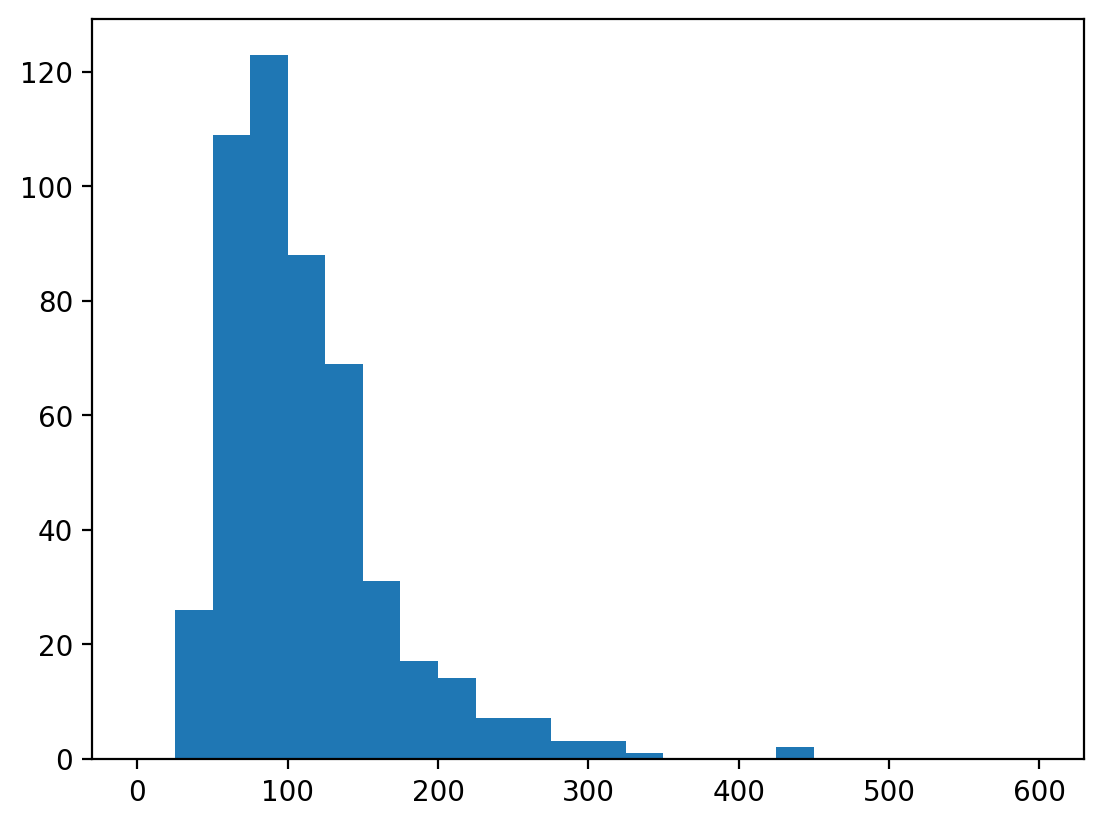

In [124]:
test_lens
res = plt.hist(test_lens, bins=list(range(0, 601, 25)))
print_data_for_latex_hist(res)

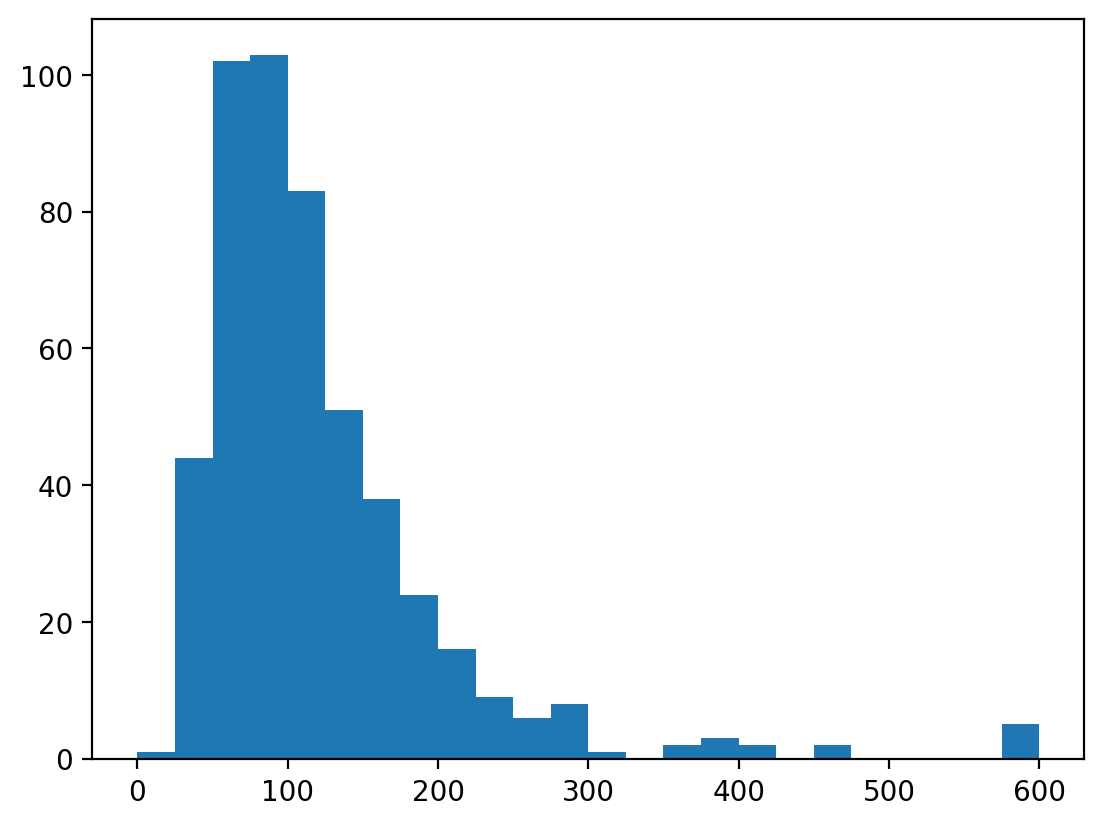

In [108]:
generated_lens = []
for tune in generated_tunes:
    generated_lens.append(len(ds.squeeze_tokenized_tune(ds.tune_tokenized(tune))))
sth = plt.hist(generated_lens, bins=list(range(0, 601, 25)))

In [153]:
print(tune)
list(tune.metrics.bar_lengths())[:10]

X: 0
L: 1/8
K: Bb
F2 | B3FG2A2 | B2c2z2
d2 | c3dc3B | AGF2z2
F2 | B3cd3B | c3dc2
B2 | A4F4 | G3GF2
B2 | dcBAF2
B2 | dcBAG2z2
A3Bc2c2 | c2e2d2
d2 | B2BBG2AA | F3BB2z
B | ccecB2



[4, 16, 12, 4, 16, 12, 4, 16, 12, 4]

### długości melodii w bitach

(0, 3) (25, 71) (50, 95) (75, 114) (100, 48) (125, 62) (150, 26) (175, 32) (200, 15) (225, 8) (250, 8) (275, 4) (300, 6) (325, 3) (350, 2) (375, 1) (400, 1) (425, 0) (450, 0) (475, 0) (500, 0) (525, 1) (550, 0) (575, 0) (600, 0) (625, 0) (650, 0) (675, 0) (700, 0) (725, 0) (750, 0) (775, 0) (800, 0) 

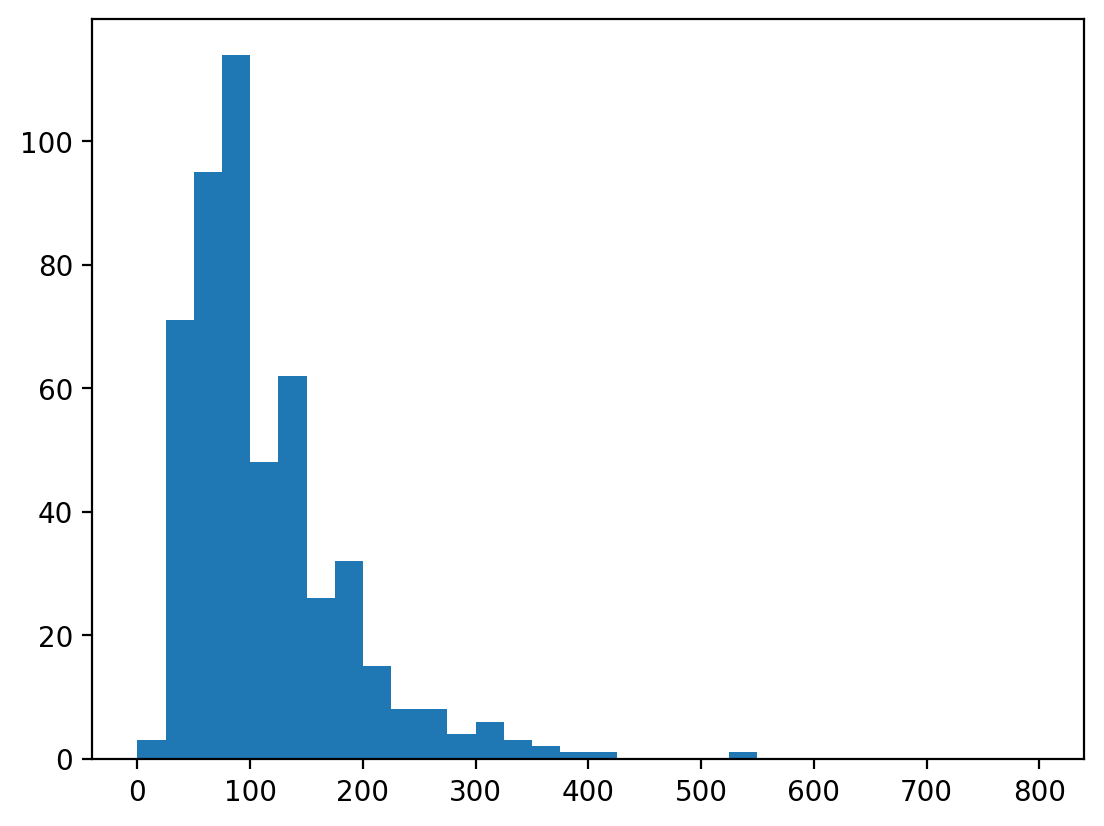

In [158]:
unit_bit_lens = []
for tune in test_tunes:
    unit_bit_lens.append(sum(tune.metrics.bar_lengths()))
res = plt.hist([x // 2 for x in unit_bit_lens], bins=list(range(0, 801, 25)))
print_data_for_latex_hist(res)

(0, 5) (25, 71) (50, 100) (75, 88) (100, 57) (125, 58) (150, 36) (175, 25) (200, 15) (225, 9) (250, 12) (275, 3) (300, 0) (325, 4) (350, 5) (375, 0) (400, 2) (425, 3) (450, 1) (475, 1) (500, 0) (525, 0) (550, 0) (575, 0) (600, 1) (625, 0) (650, 1) (675, 0) (700, 3) (725, 0) (750, 0) (775, 0) (800, 0) 

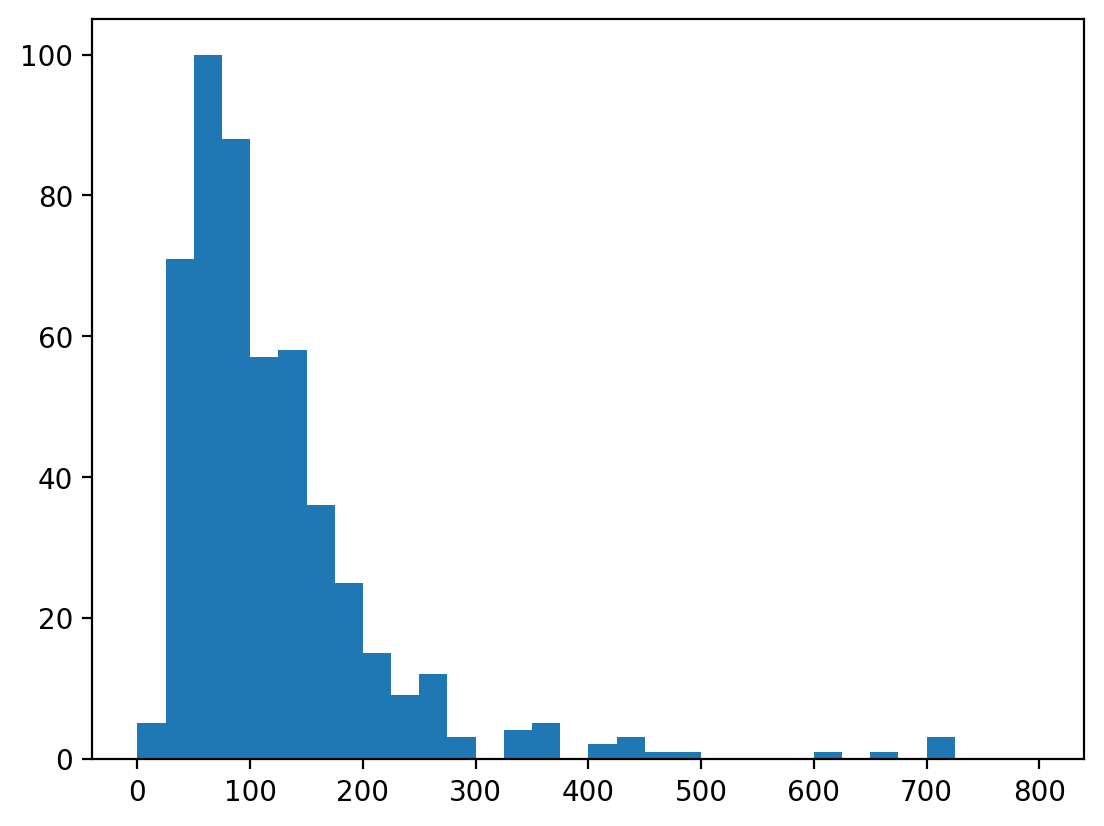

In [159]:
unit_bit_lens = []
for tune in generated_tunes:
    unit_bit_lens.append(sum(tune.metrics.bar_lengths()))
res = plt.hist([x // 2 for x in unit_bit_lens], bins=list(range(0, 801, 25)))
print_data_for_latex_hist(res)

### korelacje w między długościami przedłużanych melodii

In [267]:
test_tunes[0]

extended_tunes = []

for ttune in test_tunes:
    prompt = encode_tune(model, ttune)[:20]
    new_tune = model.generate_tune(prompt, max_len=600)
    extended_tunes.append(parse_abc_tune(new_tune.splitlines()))

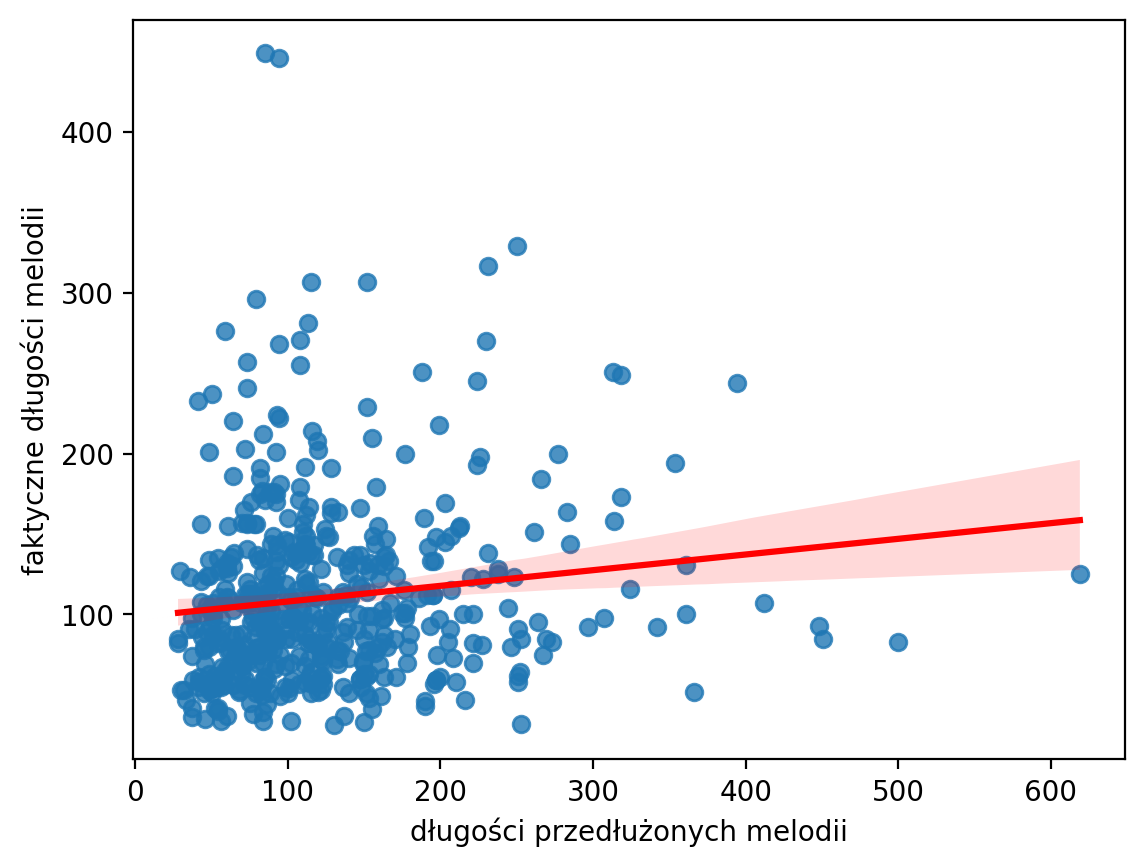

In [290]:
import seaborn as sns

tlens = []
elens = []
for ttune, etune in zip(test_tunes, extended_tunes):
    lt = len(ds.squeeze_tokenized_tune(ds.tune_tokenized(ttune)))
    le = len(ds.squeeze_tokenized_tune(ds.tune_tokenized(etune)))
    tlens.append(lt)
    elens.append(le)
data = {"test": tlens, "ext": elens}

# m, b = np.polyfit(elens, tlens, 1)
# plt.scatter(elens, tlens)
# plt.plot()

sns.color_palette("muted")
sns.regplot(x=elens, y=tlens, line_kws={"color": "red"})
plt.xlabel("długości przedłużonych melodii")
plt.ylabel("faktyczne długości melodii")
plt.savefig("korelacja_przedłużonych_20.svg")

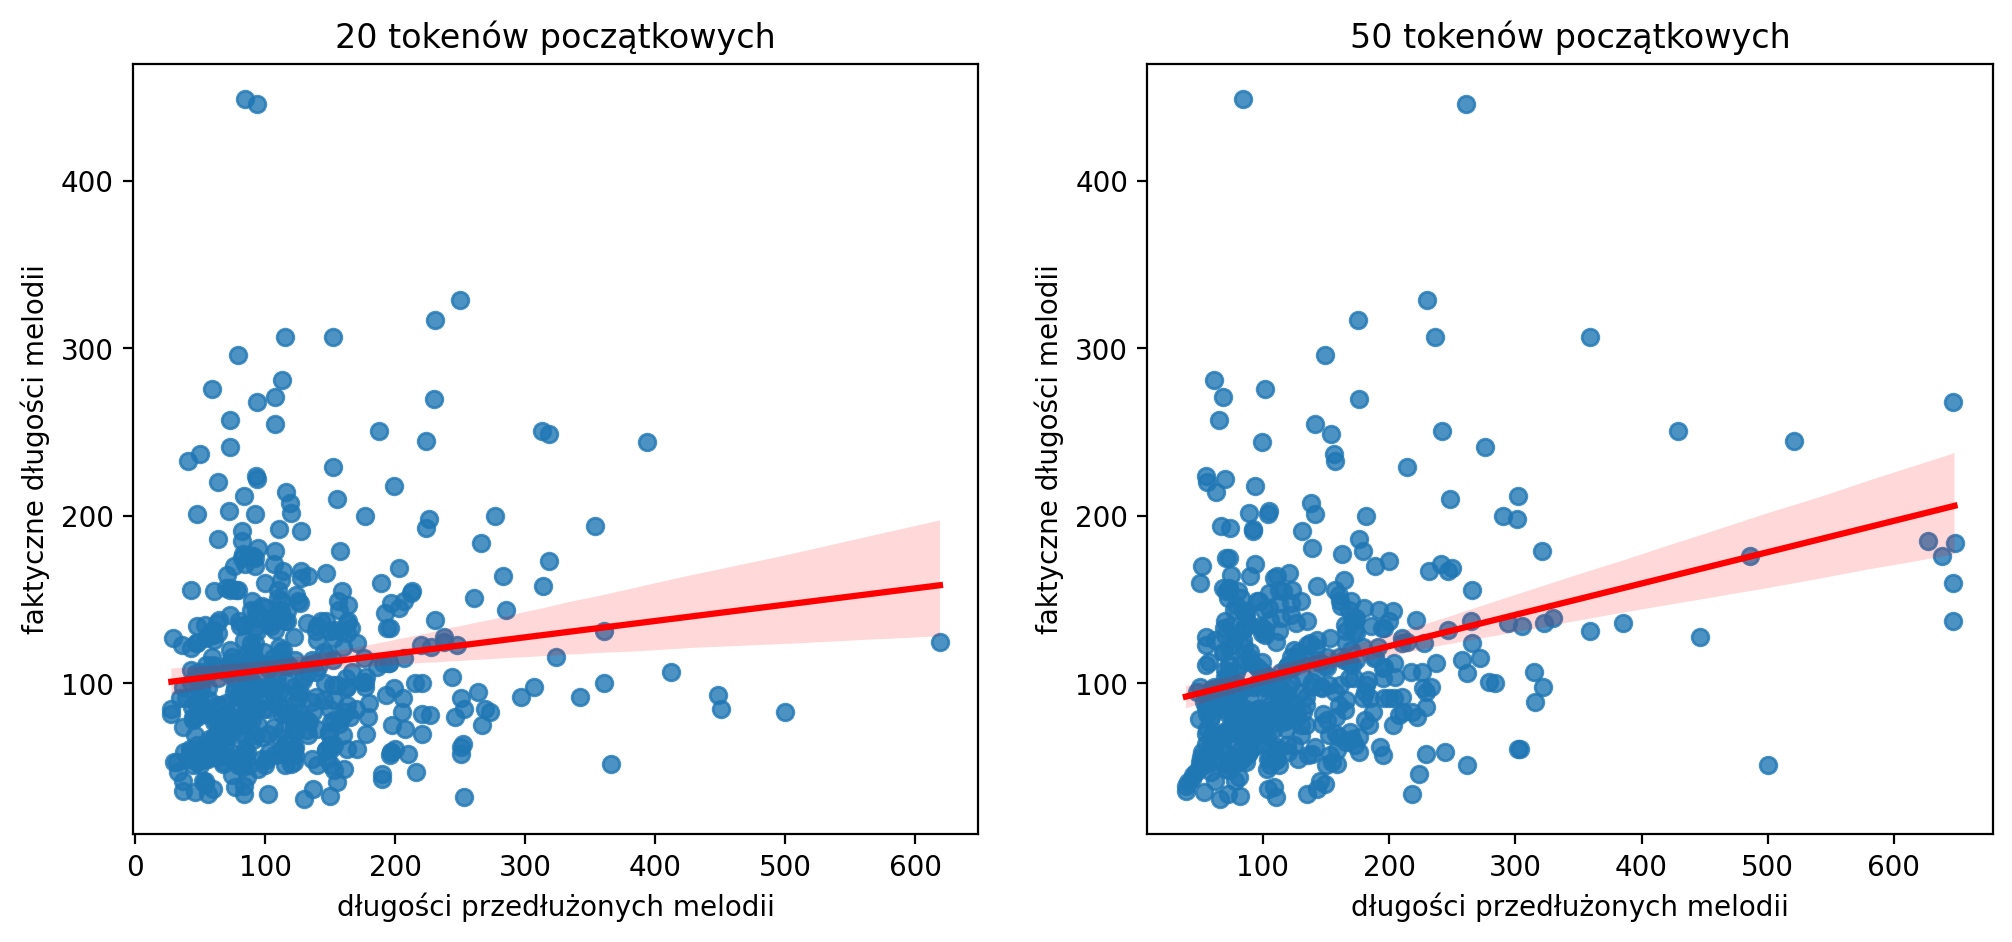

In [300]:
# test_tunes[0]

# extended_tunes_2 = []

# for ttune in test_tunes:
#     prompt = encode_tune(model, ttune)[:50]
#     new_tune = model.generate_tune(prompt, max_len=600)
#     extended_tunes_2.append(parse_abc_tune(new_tune.splitlines()))


### plot 1


tlens = []
elens = []
for ttune, etune in zip(test_tunes, extended_tunes):
    lt = len(ds.squeeze_tokenized_tune(ds.tune_tokenized(ttune)))
    le = len(ds.squeeze_tokenized_tune(ds.tune_tokenized(etune)))
    tlens.append(lt)
    elens.append(le)
data = {"test": tlens, "ext": elens}

# m, b = np.polyfit(elens, tlens, 1)
# plt.scatter(elens, tlens)
# plt.plot()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.color_palette("muted")
sns.regplot(x=elens, y=tlens, line_kws={"color": "red"}, ax=ax[0])
ax[0].set_title("20 tokenów początkowych")
ax[0].set_xlabel("długości przedłużonych melodii")
ax[0].set_ylabel("faktyczne długości melodii")
# plt.savefig("korelacja_przedłużonych_20.svg")

### plot 2

tlens = []
elens = []
for ttune, etune in zip(test_tunes, extended_tunes_2):
    lt = len(ds.squeeze_tokenized_tune(ds.tune_tokenized(ttune)))
    le = len(ds.squeeze_tokenized_tune(ds.tune_tokenized(etune)))
    tlens.append(lt)
    elens.append(le)
data = {"test": tlens, "ext": elens}

# m, b = np.polyfit(elens, tlens, 1)
# plt.scatter(elens, tlens)
# plt.plot()

sns.color_palette("muted")
sns.regplot(x=elens, y=tlens, line_kws={"color": "red"}, ax=ax[1])
ax[1].set_title("50 tokenów początkowych")
ax[1].set_xlabel("długości przedłużonych melodii")
ax[1].set_ylabel("faktyczne długości melodii")
plt.savefig("korelacja_przedłużonych.svg")

X: 0
T: 6952
L: 1/8
K: F
F2A2F2A2 | GFGAF2z2
A2c2A2c2 | BABcA2z2
G2G2AGFG | A2A2cBA2
G2G2AGFG | A2A2cBA2
c4dcBA | B4cB
AG | A2A2BABc | A4z4



In [332]:
from collections import Counter

def cleaned_up_bar_lens(tune: TuneABC) -> list[int]:
    bar_lens = list(tune.metrics.bar_lengths())
    max_bar_len = max(bar_lens)
    new_bar_lens = []
    last_bar_len = None
    for bl in bar_lens:
        if bl == max_bar_len:
            if last_bar_len is not None:
                new_bar_lens.append(last_bar_len)
                last_bar_len = None
            new_bar_lens.append(bl)
        elif last_bar_len is None:
            last_bar_len = bl
            continue
        elif last_bar_len + bl == max_bar_len:
            new_bar_lens.append(max_bar_len)
            last_bar_len = None
        else:
            new_bar_lens.append(last_bar_len)
            new_bar_lens.append(bl)
            last_bar_len = None
    return new_bar_lens


idx = 30
print(list(test_tunes[idx].metrics.bar_lengths()))
print(cleaned_up_bar_lens(test_tunes[idx]))
# print(test_tunes[10])

[4, 24, 20, 4, 24, 20, 4, 24, 20, 4, 24, 20, 4, 24, 20, 4, 24, 20, 4, 24, 12, 12, 24, 20]
[4, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


### długość taktów

In [415]:
# bez pierwszego taktu
t_count = Counter(((len(set(cleaned_up_bar_lens(t)[1:])) for t in test_tunes)))
g_count = Counter(((len(set(cleaned_up_bar_lens(t)[1:])) for t in generated_tunes)))

print(t_count)
print(g_count)
def disp(sth):
    for i in range(1, 11):
        print(f"({i}, {sth[i]})", end=" ")
    print()

disp(g_count)

Counter({1: 399, 2: 48, 3: 20, 4: 16, 6: 8, 5: 6, 7: 2, 9: 1})
Counter({1: 331, 2: 59, 4: 36, 3: 31, 5: 21, 6: 11, 7: 5, 8: 3, 9: 2, 10: 1})
(1, 331) (2, 59) (3, 31) (4, 36) (5, 21) (6, 11) (7, 5) (8, 3) (9, 2) (10, 1) 


In [416]:
# wszystkie takty
t_count = Counter(((len(set(cleaned_up_bar_lens(t)[:])) for t in test_tunes)))
g_count = Counter(((len(set(cleaned_up_bar_lens(t)[:])) for t in generated_tunes)))

disp(t_count)
disp(g_count)

(1, 175) (2, 263) (3, 23) (4, 21) (5, 6) (6, 6) (7, 4) (8, 1) (9, 1) (10, 0) 
(1, 125) (2, 245) (3, 41) (4, 41) (5, 24) (6, 12) (7, 5) (8, 3) (9, 3) (10, 1) 


In [420]:
def avg(lst: list) -> float:
    return sum(lst) / len(lst)

t_avg_bar_lens = Counter((avg(cleaned_up_bar_lens(t)[1:]) for t in test_tunes))
g_avg_bar_lens = Counter((avg(cleaned_up_bar_lens(t)[1:]) for t in generated_tunes))
def table_disp(sth):
    arr = sorted(sth, key=lambda x: x[0])
    print(" & ".join([str(x[0]) for x in arr]), r"\\ \hline \hline")
    print(" & ".join([str(x[1]) for x in arr]), r"\\ \hline")

table_disp(t_avg_bar_lens.most_common(6))
table_disp(g_avg_bar_lens.most_common(6))


6.0 & 8.0 & 12.0 & 16.0 & 24.0 & 32.0 \\ \hline \hline
12 & 48 & 101 & 156 & 54 & 31 \\ \hline
6.0 & 8.0 & 12.0 & 16.0 & 24.0 & 32.0 \\ \hline \hline
6 & 56 & 51 & 149 & 49 & 22 \\ \hline


### pitch class entropy

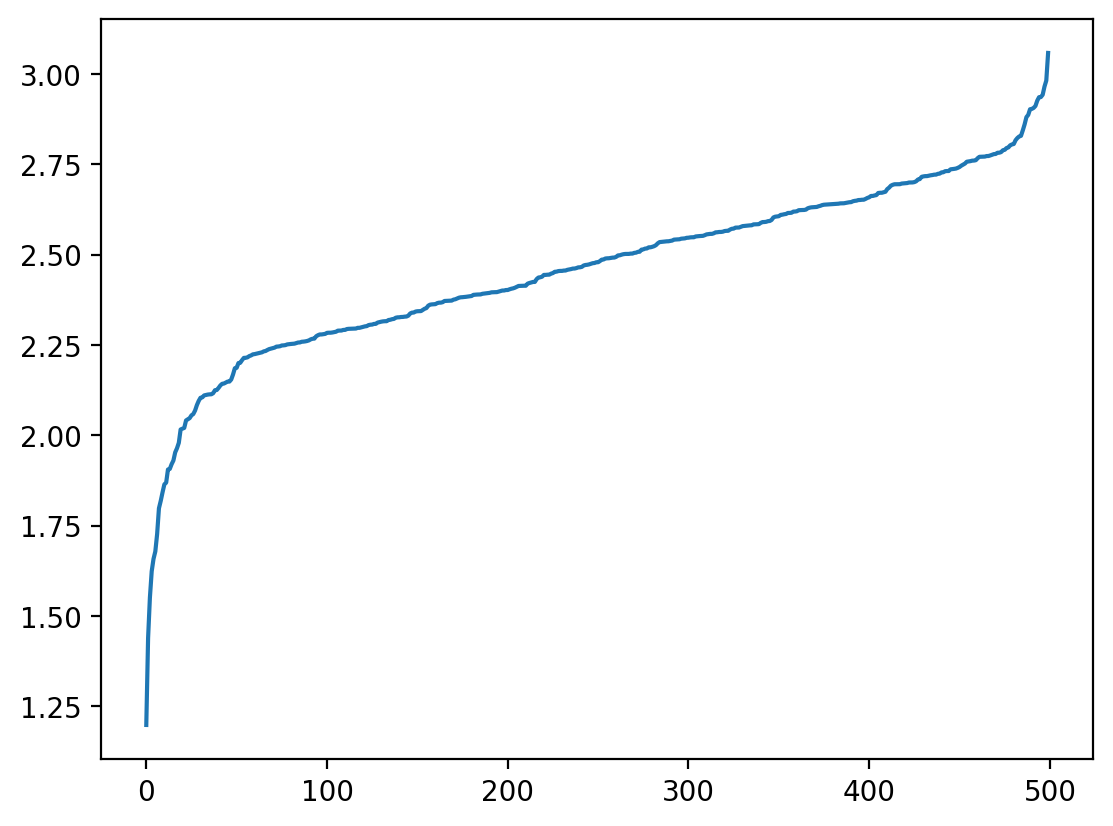

In [352]:
test_tunes[0].metrics.pitch_class_entropy()

t_ce = [tune.metrics.pitch_class_entropy() for tune in test_tunes]

In [353]:
g_ce = [tune.metrics.pitch_class_entropy() for tune in generated_tunes]

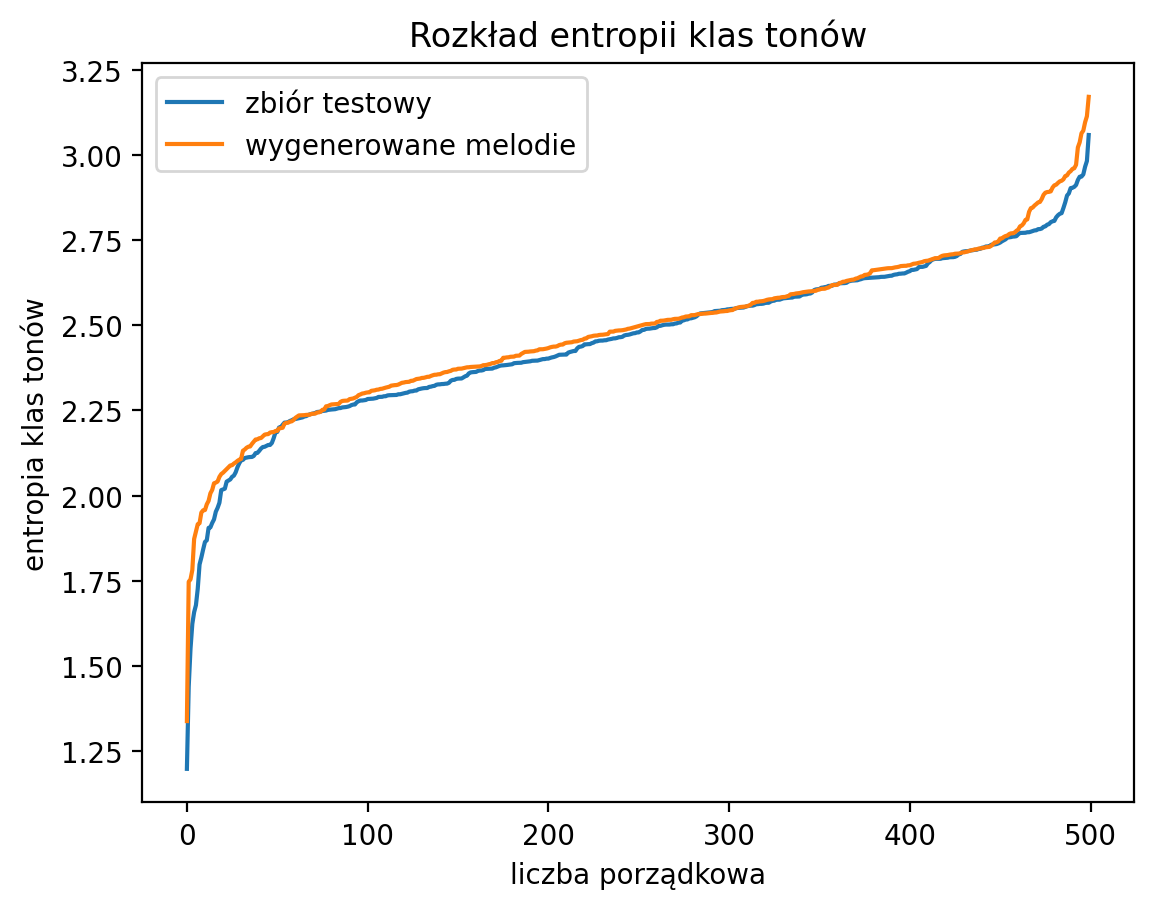

In [422]:
plt.plot(sorted(t_ce), label="zbiór testowy")
plt.plot(sorted(g_ce), label="wygenerowane melodie")
plt.title("Rozkład entropii klas tonów")
plt.xlabel("liczba porządkowa")
plt.ylabel("entropia klas tonów")
plt.legend()
plt.savefig("rozkład_entropii_klas_tonów.svg")

In [388]:
t = extended_tunes[4]

def cut_first_k(k: int, t: TuneABC) -> TuneABC:
    cut_tune = parse_abc_tune("".join(ds.squeeze_tokenized_tune(ds.tune_tokenized(t))[k:]).splitlines())
    cut_tune.K = t.K
    cut_tune.L = t.L
    return cut_tune


def split_in_half(t: TuneABC) -> tuple[TuneABC, TuneABC]:
    tokens = ds.squeeze_tokenized_tune(ds.tune_tokenized(t))
    ltokens = tokens[:len(tokens) // 2]
    rtokens = tokens[len(tokens) // 2:]

    ltune = parse_abc_tune("".join(ltokens).splitlines())
    ltune.K = t.K
    ltune.L = t.L
    rtune = parse_abc_tune("".join(rtokens).splitlines())
    rtune.K = t.K
    rtune.L = t.L
    return ltune, rtune


In [383]:
tlens = []
elens = []
for ttune, etune in zip(test_tunes, extended_tunes):
    lt = cut_first_k(20, ttune).metrics.pitch_class_entropy()
    le = cut_first_k(20, etune).metrics.pitch_class_entropy()
    tlens.append(lt)
    elens.append(le)
data = {"test": tlens, "ext": elens}

In [404]:
lpce = []
rpce = []
fail_count = 0
for tune in test_tunes:
    l, r = split_in_half(tune)
    lt = l.metrics.pitch_class_entropy()
    le = r.metrics.pitch_class_entropy()
    if lt is None or le is None:
        fail_count += 1
        continue
    lpce.append(lt)
    rpce.append(le)
data = {"lpce": lpce, "rpce": rpce}
print(fail_count)

abcFormat: WARNING: Could not get pitch information from note:  _, assuming C


0


In [407]:
glpce = []
grpce = []
fail_count = 0
for tune in generated_tunes:
    l, r = split_in_half(tune)
    lt = l.metrics.pitch_class_entropy()
    le = r.metrics.pitch_class_entropy()
    if lt is None or le is None:
        fail_count += 1
        continue
    glpce.append(lt)
    grpce.append(le)
print(fail_count)

abcFormat: WARNING: Could not get pitch information from note:  ^, assuming C
abcFormat: WARNING: Could not get pitch information from note:  _, assuming C
abcFormat: WARNING: Could not get pitch information from note:  _, assuming C


0


In [405]:
sum((1 for x in rpce if x is None))

0

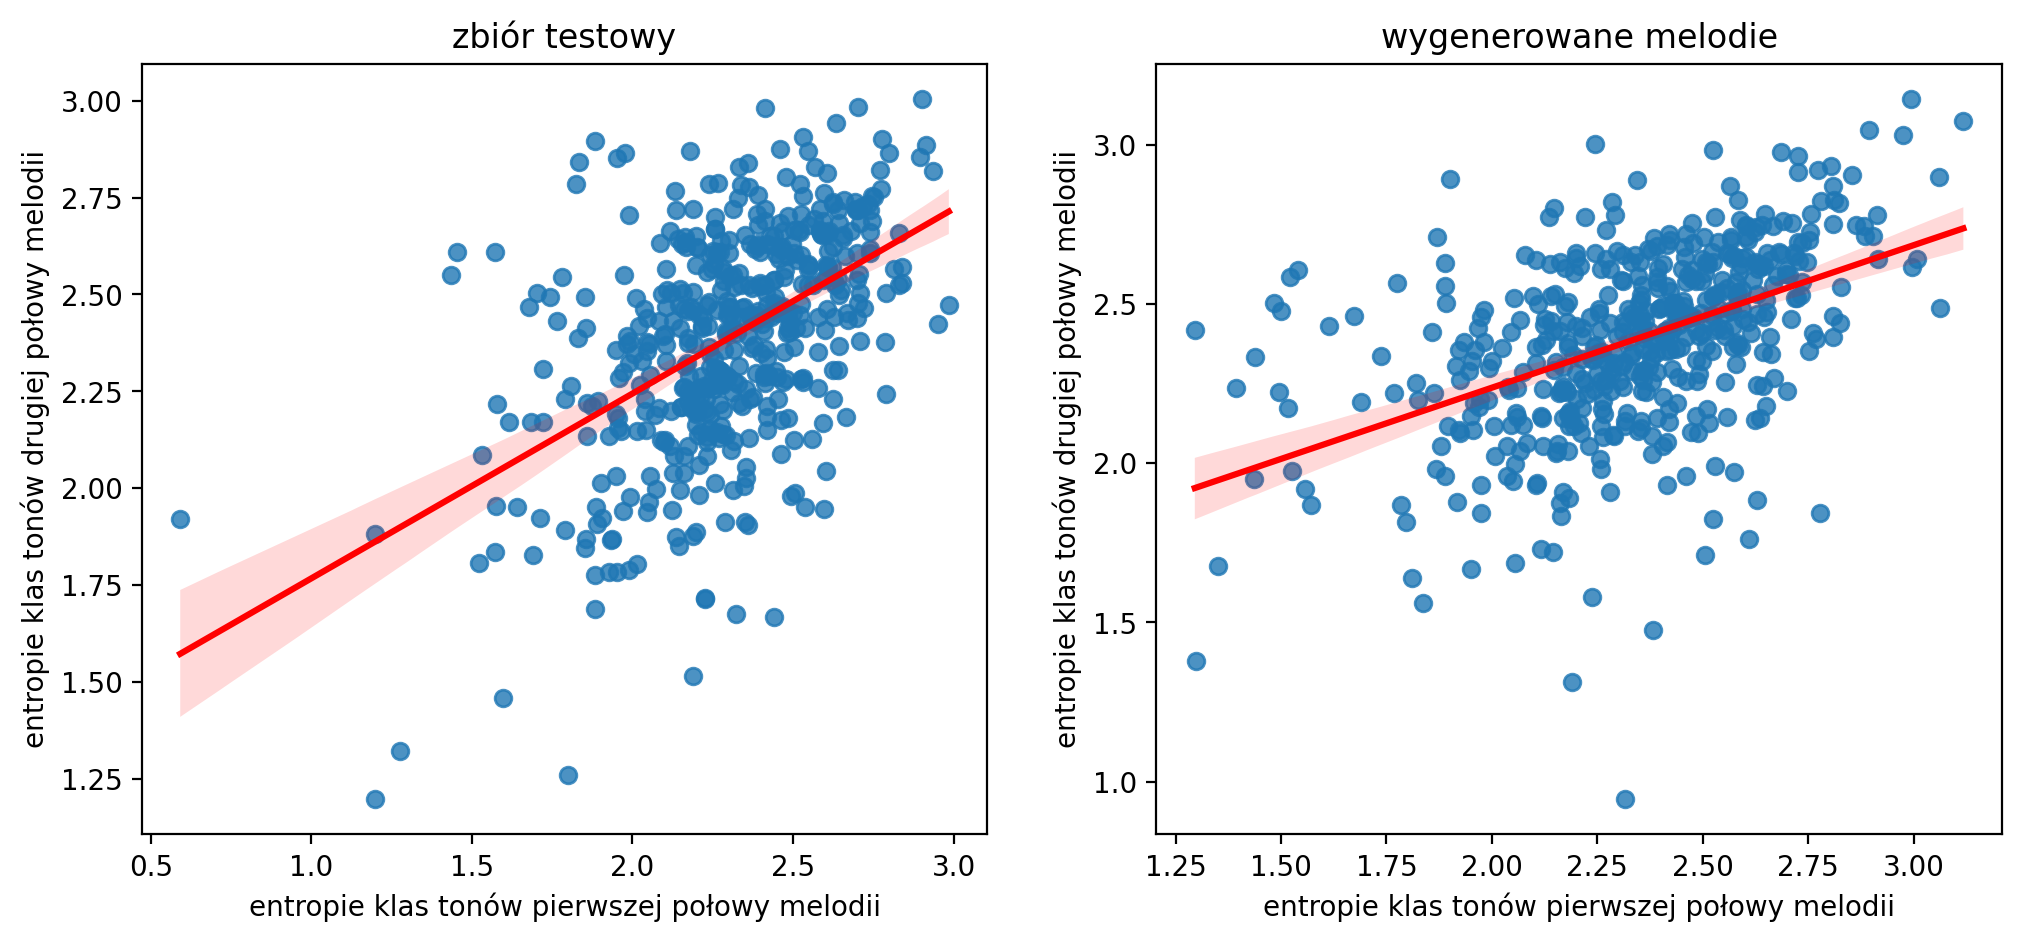

In [410]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x=lpce, y=rpce, line_kws={"color": "red"}, ax=ax[0])
ax[0].set_title("zbiór testowy")
ax[0].set_xlabel("entropie klas tonów pierwszej połowy melodii")
ax[0].set_ylabel("entropie klas tonów drugiej połowy melodii")
# plt.savefig("korelacja_przedłużonych_20.svg")


sns.regplot(x=glpce, y=grpce, line_kws={"color": "red"}, ax=ax[1])
ax[1].set_title("wygenerowane melodie")
ax[1].set_xlabel("entropie klas tonów pierwszej połowy melodii")
ax[1].set_ylabel("entropie klas tonów drugiej połowy melodii")
# plt.savefig("korelacja_ekt_połówek.svg")

In [448]:
tune = parse_abc_tune( model.generate_tune(max_len=200).splitlines())
print(tune)

tune.play()

X: 0
L: 1/16
K: Bb
F2 | F2F2D2F2 | B2A2G2
c2 | B2c2d2c2 | B4z2
d2 | dcd2d2c2 | d2c2B2
c2 | d2d2d2g2 | c4z2
F2 | F2F2G2B2 | dcBAF2
F2 | G2B2c2A2 | AGF2F2

4.68 February 18 2022 abc2midi
Warning in line-char 3-0 : No M: in header, using default
writing MIDI file /tmp/tmptsghml1q
Playing /tmp/tmptsghml1q
MIDI file: /tmp/tmptsghml1q
Format: 0  Tracks: 1  Divisions: 480
Text: note track
Playing time: ~15 seconds
Notes cut: 0
Notes lost totally: 0


In [452]:
t = test_tunes[10]
print(t)
t.play()

X: 0
T: 6952
L: 1/8
K: F
F2A2F2A2 | GFGAF2z2
A2c2A2c2 | BABcA2z2
G2G2AGFG | A2A2cBA2
G2G2AGFG | A2A2cBA2
c4dcBA | B4cB
AG | A2A2BABc | A4z4

4.68 February 18 2022 abc2midi
Warning in line-char 4-0 : No M: in header, using default
writing MIDI file /tmp/tmpeko27wyq
Playing /tmp/tmpeko27wyq
MIDI file: /tmp/tmpeko27wyq
Format: 0  Tracks: 1  Divisions: 480
Text: note track
Sequence: 6952
Playing time: ~26 seconds
Notes cut: 0
Notes lost totally: 0
